# Estimation of decoherence error

This notebook illustrates the decoherence errors that are expected to happen on different qubits.

## Backend initialisation

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load IBMQ Account data
from qiskit import IBMQ
IBMQ.load_account()

# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default') 
backend = provider.get_backend('ibmq_casablanca')
properties = backend.properties()
configuration = backend.configuration()
defaults = backend.defaults()

## Characteristic times retrieval

In [2]:
import numpy

T1s = numpy.array([properties.t1(i) for i in range(configuration.num_qubits)])
T2s = numpy.array([properties.t2(i) for i in range(configuration.num_qubits)])

## Computing the probability of having at least one error

In [3]:
def compute_error_probability(T1: float, T2: float, times: numpy.ndarray):
    return (1 - numpy.exp(-t / T1)) + (1 - numpy.exp(-t / T2))

## Plot

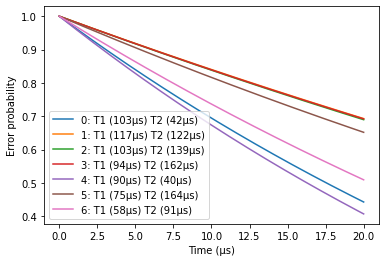

In [4]:
import matplotlib.pyplot as plt

t = numpy.linspace(0, 20e-6, 200)
for i, (t1, t2) in enumerate(zip(T1s, T2s)):
    plt.plot(t * 1e6, 1 - compute_error_probability(t1, t2, t), 
             label=f"{i}: T1 ({int(round(t1*1e6))}µs) T2 ({int(round(t2*1e6))}µs)")
plt.legend()
plt.xlabel("Time (µs)")
plt.ylabel("Error probability")
plt.show()